# 🧠 Neural Network from Scratch – MNIST Digit Classifier

##  Neural Network Overview
A Neural Network (NN) is a type of machine learning model inspired by the way the human brain processes information and makes decisions. It consists of multiple layers of interconnected nodes, called artificial neurons, which mimic the behavior of biological neurons. These layers work together to process input data, learn patterns, and generate accurate predictions or decisions.
### Input Layer  →  Hidden Layer(s)  →  Output Layer
     🔢             🧮🧮🧮              🎯

This notebook implements a two-layer Neural Network designed to recognize handwritten digits from the MNIST dataset.

### 📦 Importing Required Python Libraries


In [8]:
import numpy as np # Numerical operations
import pandas as pd # Data handling and analysis
from matplotlib import pyplot as  plt  # Plotting and visualization

### 📄 Load the Dataset

In [9]:
# Load the MNIST training dataset
df=pd.read_csv("train.csv",low_memory=False) 
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Show top five elements from the data set
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 🧪 Data Preparation & Normalization
Before training the neural network, we must preprocess the data:
- 📄 **Convert to NumPy Array**: We convert the Pandas DataFrame into a NumPy array for efficient numerical computations.
- 🔀 **Shuffle**: We randomly shuffle the dataset to remove any ordering bias that might affect training or evaluation.
- ✂️ **Split**: The dataset is split into two parts:
  - **Training Set**: 59,000 samples used to train the model.
  - **Development Set**: 1,000 samples used to validate model performance during development.
- 🔁 **Transpose**: Transposing puts each sample as a column vector, which is ideal for matrix-based neural network operations.
- 🧼 **Normalize Pixel Values**: Dividing by 255 scales all pixel values to the range [0, 1], which helps the neural network learn more efficiently.

This preprocessing pipeline ensures that the data is clean, randomized, and formatted correctly for training a neural network from scratch.

In [13]:
data = np.array(df)  # Converting the Pandas DataFrame into a Numpy Array.

"""
Firstly, take the number of rows (r) and columns (c) in the dataset.
@param r = number of samples (images), @param c = number of features (pixels + label).
For MNIST: r = 60000, c = 785 (1 label + 784 pixels).
"""
r, c = data.shape  


# Shuffle and split 
np.random.shuffle(data)  #This is like shuffling a deck of cards before dealing.

data_dev = data [0:1000].T # Every row is a column now for easier math.
Y_dev = data_dev[0]
X_dev = data_dev[1:c] / 255.0  # Normalize.Dividing by 255 makes them between 0 and 1.

data_train = data [1000:r].T
Y_train = data_train [0]
X_train = data_train [1:c] / 255.0  # Normalize.Dividing by 255 makes them between 0 and 1.

In [14]:
# shape of the first image’s pixel data for review.
X_train[:,0].shape

(784,)

## ⚙️ Initializing the Network Parameters

This function sets up the starting values for the neural network:

- **Weights (`W1` and `W2`)** tells the neural network how strong each connection is.  
  We start them with small random numbers to help the network learn better.

- **Biases (`b1` and `b2`)** are extra numbers added to each neuron.  
  We start them as zeros.

### What do the shapes mean?

- `W1` has shape `(10, 784)` because it connects 784 pixels (inputs) to 10 neurons in the first layer.  
- `b1` has shape `(10, 1)` — one bias for each of the 10 neurons.

- `W2` has shape `(10, 10)` because it connects 10 neurons to 10 output neurons (digits 0 to 9).  
- `b2` has shape `(10, 1)` — one bias for each output neuron.

Starting with good initial values helps the neural network learn faster and better!

In [15]:
def parameters():
    W1 = np.random.randn(10, 784) * np.sqrt(2. / 784)
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(2. / 10)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2


## Neural Network Functions Explained

### Activation Functions

- **ReLU (Rectified Linear Unit):**  
  Turns negative values into 0, keeps positive values unchanged. Helps the network learn complex patterns.

- **Softmax:**  
  Converts the output numbers into probabilities that add up to 1. Useful for multi-class classification like digits 0-9.

---

### Forward Propagation

- Calculates the output step-by-step:
  1. Multiply inputs by weights, add bias (`Z1`).
  2. Apply ReLU to get activations (`A1`).
  3. Multiply activations by next layer weights, add bias (`Z2`).
  4. Apply softmax to get final probabilities (`A2`).

---

### One-Hot Encoding

- Converts label numbers (e.g., 3) into vectors like `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`.  
- This format is easier for the network to work with during training.

---

### Derivative of ReLU

- Helps during backpropagation by telling the network where ReLU is “active” (greater than zero).

---

### Backpropagation

- Calculates how much each weight and bias contributed to the error.  
- Finds gradients (slopes) to update parameters in the right direction to reduce mistakes.

---

### Parameters Update

- Adjusts weights and biases slightly (using learning rate `alpha`) based on gradients to improve the network.

---

### Predictions and Accuracy

- **get_predictions:** Picks the digit with the highest probability.  
- **get_accuracy:** Compares predictions to true labels and calculates how many were correct.

---

This set of functions works together to train the neural network and make it better at recognizing handwritten digits!


In [16]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    Z_exp = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # stability
    return Z_exp / np.sum(Z_exp, axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T  # shape: (10, m)

def deriv_ReLU(Z):
    return Z > 0

def back_propagation(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def parameters_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

## 🔄 Training the Neural Network with Gradient Descent

This function trains the network step-by-step by repeating these actions:

1. **Initialize parameters** (weights and biases).
2. For a given number of **iterations**:
   - Perform **forward propagation** to calculate the outputs.
   - Perform **backpropagation** to compute gradients (how to adjust weights).
   - **Update the parameters** using the gradients and learning rate (`alpha`).
3. Every 10 iterations, it prints the current **accuracy** on the training data so you can see the learning progress.
4. Finally, it returns the trained weights and biases.

### Key points:

- `iterations`: How many times the network will learn from the whole training set.
- `alpha`: Learning rate, controlling how big each step is when updating parameters.
- The goal is to reduce errors and improve accuracy over time.

---

This loop is where the neural network **actually learns** to recognize digits by gradually improving itself!


In [17]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = parameters()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = parameters_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            acc = get_accuracy(get_predictions(A2), Y)
            print(f"Iteration {i} | Accuracy: {acc:.4f}")
    
    return W1, b1, W2, b2

## 🚀 Training the Neural Network

We start training the network using the `gradient_descent` function:

In [26]:
# Run gradient descent for 500 iterations with learning rate 0.1
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration 0 | Accuracy: 0.1087
Iteration 10 | Accuracy: 0.4036
Iteration 20 | Accuracy: 0.5972
Iteration 30 | Accuracy: 0.7349
Iteration 40 | Accuracy: 0.7745
Iteration 50 | Accuracy: 0.7962
Iteration 60 | Accuracy: 0.8138
Iteration 70 | Accuracy: 0.8271
Iteration 80 | Accuracy: 0.8375
Iteration 90 | Accuracy: 0.8457
Iteration 100 | Accuracy: 0.8518
Iteration 110 | Accuracy: 0.8575
Iteration 120 | Accuracy: 0.8626
Iteration 130 | Accuracy: 0.8664
Iteration 140 | Accuracy: 0.8693
Iteration 150 | Accuracy: 0.8718
Iteration 160 | Accuracy: 0.8742
Iteration 170 | Accuracy: 0.8762
Iteration 180 | Accuracy: 0.8783
Iteration 190 | Accuracy: 0.8800
Iteration 200 | Accuracy: 0.8819
Iteration 210 | Accuracy: 0.8832
Iteration 220 | Accuracy: 0.8849
Iteration 230 | Accuracy: 0.8862
Iteration 240 | Accuracy: 0.8878
Iteration 250 | Accuracy: 0.8891
Iteration 260 | Accuracy: 0.8904
Iteration 270 | Accuracy: 0.8917
Iteration 280 | Accuracy: 0.8929
Iteration 290 | Accuracy: 0.8942
Iteration 300 | Accur

## 📥 Loading the Test Data

In [27]:
df1=pd.read_csv("test.csv",low_memory=False)
df1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Show top five elements from the testing dataset.
df1.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 🧐 Making and Visualizing Predictions

### `decidePrediction`

- Takes an input image and the trained parameters.
- Runs the image through the network (`forward_propagation`).
- Returns the predicted digit.

---

### `test_predictions`

- Takes an index of an image from the training set and the trained parameters.
- Gets the prediction for that specific image.
- Prints the predicted digit and the true label.
- Displays the image so you can visually check if the prediction is correct.

This helps you **see how well your model is doing** on individual examples!


In [22]:
def decidePrediction(X,W1,b1,W2,b2):
    _,_,_,A2= forward_propagation(W1,b1,W2,b2,X)
    predictions=get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    img_now=X_train[:,index,None]
    prediction= decidePrediction(X_train[:,index,None],W1, b1, W2, b2)
    label=Y_train[index]
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")

    img_now=img_now.reshape(28,28)*255
    plt.gray()
    plt.imshow(img_now,interpolation="nearest")
    plt.show()

Prediction: [3]
Label: 3


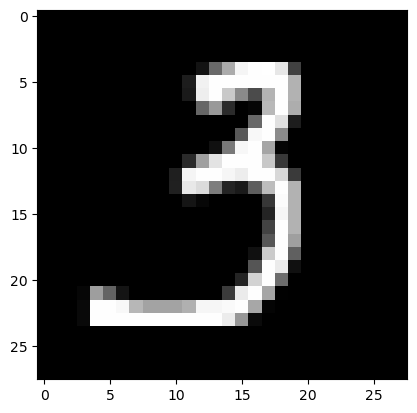

In [23]:
test_predictions(3, W1, b1, W2, b2)

Prediction: [6]
Label: 6


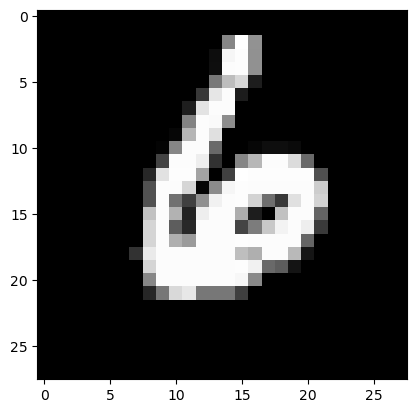

In [24]:
test_predictions(10, W1, b1, W2, b2)

Prediction: [5]
Label: 5


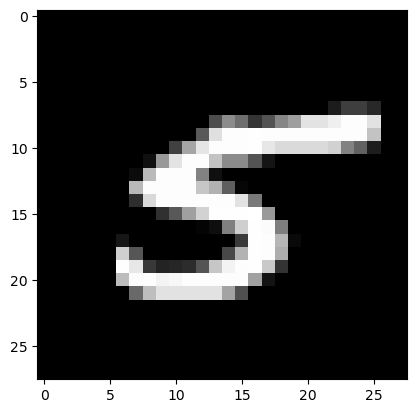

In [25]:
test_predictions(101, W1, b1, W2, b2)

### Development Set Evaluation
The model was used to make predictions on the development set using the learned parameters `W1`, `b1`, `W2`, and `b2`. The accuracy of these predictions compared to the true labels `Y_dev` is **0.906**, indicating that the model correctly classifies about 90.6% of the development examples.


In [29]:
dev_predictions=decidePrediction(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions,Y_dev)

0.906